# Name: Madison Gonsalves
# Roll no: 25 
# Class/Batch: Se Aiml / B-2
# Experiment-3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.

## OLS

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
X = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])

In [3]:
model = LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
w = model.coef_[0]
b = model.intercept_

print(f"w (slope) ={w}")
print(f"b (intercept) ={b}")

w (slope) =1.4999999999999998
b (intercept) =0.3333333333333339


In [5]:
y_pred = model.predict(X)
print("\nPredictions for training data: ")
for xi, yi, ypi in zip(X.flatten(),y,y_pred):
    print(f"X={xi}, Actual Sales={yi}, Predicte sales={ypi:.2f}")

mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

print(f"\nMean Square Error (MSE) = {mse:.4f}")
print(f"R\u00b2 Score: {r2:.4f}")


Predictions for training data: 
X=1, Actual Sales=2, Predicte sales=1.83
X=2, Actual Sales=3, Predicte sales=3.33
X=3, Actual Sales=5, Predicte sales=4.83

Mean Square Error (MSE) = 0.0556
R² Score: 0.9643


In [6]:
X_in = np.array([10,20,30,50]).reshape(-1,1)
y_opt = np.array([12,21,29,48])

In [7]:
model_new = LinearRegression()
model_new.fit(X_in,y_opt)

w0 = model_new.coef_[0]
b0 = model_new.intercept_

print(f"w (slope) ={w0}")
print(f"b (intercept) ={b0}")

y_pred_new = model_new.predict(X_in)
print("\nPredictions for training data: ")
for xi, yi, ypi in zip(X.flatten(),y_opt,y_pred_new):
    print(f"X={xi}, Actual Sales={yi}, Predicte sales={ypi:.2f}")

mse_new = mean_squared_error(y_opt,y_pred_new)
r2_new = r2_score(y_opt,y_pred_new)

print(f"\nMean Square Error (MSE) = {mse_new:.4f}")
print(f"R\u00b2 Score: {r2_new:.4f}")

w (slope) =0.8971428571428572
b (intercept) =2.8285714285714256

Predictions for training data: 
X=1, Actual Sales=12, Predicte sales=11.80
X=2, Actual Sales=21, Predicte sales=20.77
X=3, Actual Sales=29, Predicte sales=29.74

Mean Square Error (MSE) = 0.1857
R² Score: 0.9989


## MLE

In [8]:
import scipy.optimize as opt

In [9]:
X = np.array([1,2,3])
y = np.array([2,3,5])

In [10]:
def neg_log_likelihood(params):
    w, b = params
    sigma2 = 1
    y_pred = w*X + b
    nll = 0.5*np.sum((y - y_pred)**2 / sigma2)
    return nll

In [11]:
initial_guess = [0,0]

result = opt.minimize(neg_log_likelihood, initial_guess)
w_mle,b_mle = result.x

print(f"MLE w ={w_mle}")
print(f"MLE b ={b_mle}")

MLE w =1.5000000042671844
MLE b =0.3333333912814873


In [12]:
y_pred = w_mle * X + b_mle

print("\nPreditions for Training data")
for xi, yi, ypi in zip(X.flatten(),y,y_pred):
    print(f"X={xi}, Actual Sales={yi}, Predicte sales={ypi:.2f}")


Preditions for Training data
X=1, Actual Sales=2, Predicte sales=1.83
X=2, Actual Sales=3, Predicte sales=3.33
X=3, Actual Sales=5, Predicte sales=4.83


## GD

In [13]:
w,b = 0,0
alpha = 0.0001
n_iter = 1000
n = len(X)

for i in range(n_iter):
    y_pred = w*X.flatten() + b
    dw = (-2/n)*np.sum(X.flatten()*(y - y_pred))
    db = (-2/n)*np.sum(y - y_pred)
    w -= alpha*dw
    b -= alpha*db

print("Slope (w): ", w)
print("Intercept (b): ", b)

Slope (w):  0.9277932204091286
Intercept (b):  0.4003820339618283


In [14]:
y_pred = w * X + b

print("\nPreditions for Training data")
for xi, yi, ypi in zip(X.flatten(),y,y_pred):
    print(f"X={xi}, Actual Sales={yi}, Predicte sales={ypi:.2f}")

mse_new = mean_squared_error(y,y_pred)
r2_new = r2_score(y,y_pred)
print(f"\nMean Square Error (MSE) = {mse_new:.4f}")
print(f"R\u00b2 Score: {r2_new:.4f}")    


Preditions for Training data
X=1, Actual Sales=2, Predicte sales=1.33
X=2, Actual Sales=3, Predicte sales=2.26
X=3, Actual Sales=5, Predicte sales=3.18

Mean Square Error (MSE) = 1.4346
R² Score: 0.0778


In [15]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3])
y = np.array([2,3,5])
n = len(X)

def loss(w1):
    w0 = np.mean(y) - w1 * np.mean(X)
    y_pred = w0 + w1*X
    return np.mean((y - y_pred)**2)

def gradient(w1):
    w0 = np.mean(y) - w1 * np.mean(X)
    y_pred = w1 * X + w0
    return -2 * np.sum(X*(y - y_pred))

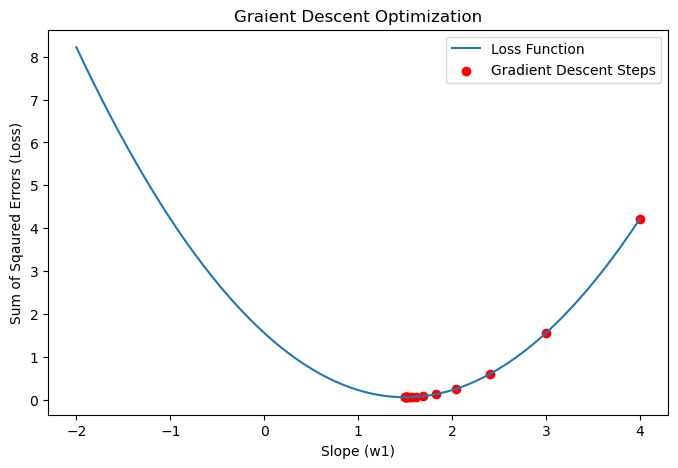

In [16]:
lr = 0.1
w1 = 4
iteration = 15

w1_values = []
loss_values = []

for i in range(iteration):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    w1 = w1 - lr*gradient(w1)

w_space = np.linspace(-2,4,200)
loss_space = [loss(w) for w in w_space]
plt.figure(figsize=(8,5))
plt.plot(w_space, loss_space, label='Loss Function')
plt.scatter(w1_values, loss_values, color='red', label='Gradient Descent Steps')
plt.xlabel('Slope (w1)')
plt.ylabel('Sum of Sqaured Errors (Loss)')
plt.title('Graient Descent Optimization')
plt.legend() 
